In [4]:
import pandas as pd
import datetime

public_bonds_table=pd.read_csv('cleaned_public_bonds.csv')
corporate_bonds_table=pd.read_csv('cleaned_corporate_bonds.csv')
cash_table=pd.read_csv('cleaned_cash.csv')

portfolios=pd.read_csv('portfolio_allocations.csv')

# Removing the unnecessary column
del public_bonds_table['Unnamed: 0']
del corporate_bonds_table['Unnamed: 0']
del cash_table['Unnamed: 0'] 
del portfolios['Unnamed: 0']

In [5]:
# Filter the portfolios so that we use only the ones where stocks and gold have 0% shares and the cash has exactly 10% of the shares
filter_ST = portfolios["ST"] == 0
filter_GO = portfolios["GO"] == 0
filter_CA = portfolios["CA"] == 10
filtered_portfolios = portfolios[filter_ST & filter_GO & filter_CA]
print(filtered_portfolios)

      ST  CB  PB  GO  CA
225    0   0  90   0  10
435    0   5  85   0  10
625    0  10  80   0  10
796    0  15  75   0  10
949    0  20  70   0  10
1085   0  25  65   0  10
1205   0  30  60   0  10
1310   0  35  55   0  10
1401   0  40  50   0  10
1479   0  45  45   0  10
1545   0  50  40   0  10
1600   0  55  35   0  10
1645   0  60  30   0  10
1681   0  65  25   0  10
1709   0  70  20   0  10
1730   0  75  15   0  10
1745   0  80  10   0  10
1755   0  85   5   0  10
1761   0  90   0   0  10


In [7]:
# Fix the index displayed
filtered_portfolios = filtered_portfolios.reset_index()
del filtered_portfolios['index']
print(filtered_portfolios)

    ST  CB  PB  GO  CA
0    0   0  90   0  10
1    0   5  85   0  10
2    0  10  80   0  10
3    0  15  75   0  10
4    0  20  70   0  10
5    0  25  65   0  10
6    0  30  60   0  10
7    0  35  55   0  10
8    0  40  50   0  10
9    0  45  45   0  10
10   0  50  40   0  10
11   0  55  35   0  10
12   0  60  30   0  10
13   0  65  25   0  10
14   0  70  20   0  10
15   0  75  15   0  10
16   0  80  10   0  10
17   0  85   5   0  10
18   0  90   0   0  10


In [8]:
print(f"{filtered_portfolios.loc[0][0]}-{filtered_portfolios.loc[0][1]}-{filtered_portfolios.loc[0][2]}-{filtered_portfolios.loc[0][3]}-{filtered_portfolios.loc[0][4]}")

0-0-90-0-10


## Investing the first day

In [13]:
import math

def calculating_return(original, current):
  return ((current - original) / original) * 100

assets = [corporate_bonds_table, public_bonds_table, cash_table]

portfolio_results = {}

investing_money = 100000
for index in range(19):

  # Percentage of money for each asset
  corporate_bonds = (filtered_portfolios.loc[index][1] / 100) * investing_money
  public_bonds = (filtered_portfolios.loc[index][2] / 100) * investing_money
  cash = (filtered_portfolios.loc[index][4] / 100) * investing_money

  # Buying shares the first day
  numOfCorpBonds = math.floor(corporate_bonds / corporate_bonds_table.loc[0]["Price"])
  numOfPubBonds = math.floor(public_bonds / public_bonds_table.loc[0]["Price"])
  numOfCash = math.floor(cash / cash_table.loc[0]["Price"])

  asset_shares = [numOfCorpBonds, numOfPubBonds, numOfCash]

  buy_amount = numOfCorpBonds * corporate_bonds_table.loc[0]["Price"] \
              + numOfPubBonds * public_bonds_table.loc[0]["Price"] \
              + numOfCash * cash_table.loc[0]["Price"]

  current_value = 0

  for count, asset in enumerate(assets):
    for row in asset.tail(1).itertuples():
      current_value += row[2] * asset_shares[count]
  
  portfolio_results.update({index: [calculating_return(buy_amount, current_value)]})

In [19]:

#print(portfolio_results)
filtered_portfolios['return'] = list(portfolio_results.values())
filtered_portfolios

,ST,CB,PB,GO,CA,return
0,0,0,90,0,10,[-0.20900539095084253]
1,0,5,85,0,10,[-0.02569697402337267]
2,0,10,80,0,10,[0.16112668135294234]
3,0,15,75,0,10,[0.34503351405657606]
4,0,20,70,0,10,[0.5321085425710598]
5,0,25,65,0,10,[0.7188597219268359]
6,0,30,60,0,10,[0.9031297728983956]
7,0,35,55,0,10,[1.0901961185515616]
8,0,40,50,0,10,[1.2773480423537402]
9,0,45,45,0,10,[1.4600319082408215]


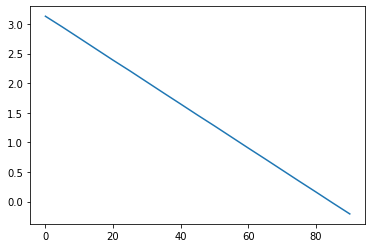

In [28]:
#The CB in this trading methodology doesn't perform well - the more the share of those the less the return is
import matplotlib.pyplot as plt
plt.plot((filtered_portfolios['PB']), list(filtered_portfolios['return']))

In [30]:
def best_results(results, portfolios):
  best_return=[results[0], 0]
  for key in results:

    # Checking for the 12M
    if results[key] > best_return[0]:
      best_return[0] = results[key]
      best_return[1] = key

  print(best_return)

  print(f"Best return for 12 month(s) period is {best_return[0][0]}, that is for the portfolio allocation: {portfolios.loc[best_return[1]][0]}-{portfolios.loc[best_return[1]][1]}-{portfolios.loc[best_return[1]][2]}-{portfolios.loc[best_return[1]][3]}-{portfolios.loc[best_return[1]][4]}")

In [31]:
best_results(portfolio_results, filtered_portfolios)

[[3.1302275274192723], 18]
Best return for 12 month(s) period is 3.1302275274192723, that is for the portfolio allocation: 0-90-0-0-10


## Investing the first day with *rebalance*

In [32]:
portfolio_results_rebalance = {}

for index in range(19):

  # Percentage of money for each asset
  corporate_bonds = (filtered_portfolios.loc[index][1] / 100) * investing_money
  public_bonds = (filtered_portfolios.loc[index][2] / 100) * investing_money
  cash = (filtered_portfolios.loc[index][4] / 100) * investing_money

  # Buying shares the first day
  numOfCorpBonds = corporate_bonds / corporate_bonds_table.loc[0]["Price"]
  numOfPubBonds = public_bonds / public_bonds_table.loc[0]["Price"]
  numOfCash = cash / cash_table.loc[0]["Price"]

  current_value = 0

  for row in public_bonds_table.itertuples():
    
    # Checking if its the 15th of the month (info needed for rebalance)
    if(row[1][8:10] == "15"):
      currentCorpBonds = numOfCorpBonds * corporate_bonds_table.loc[row[0]]["Price"]
      currentPubBonds = numOfPubBonds * public_bonds_table.loc[row[0]]["Price"]
      currentCash = numOfCash * cash_table.loc[row[0]-1]["Price"]

      currentAmount = currentCorpBonds + currentPubBonds + currentCash

      difference = 0
      numOfShares = 0

      if(currentCorpBonds / currentAmount > filtered_portfolios.loc[index][1] / 100):
        difference = currentCorpBonds - (filtered_portfolios.loc[index][1] / 100) * currentAmount
        numOfShares = difference / corporate_bonds_table.loc[row[0]]["Price"]
        numOfCorpBonds -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][1] / 100) * currentAmount - currentCorpBonds
        numOfShares = difference / corporate_bonds_table.loc[row[0]]["Price"]
        numOfCorpBonds += numOfShares
      
      if(currentPubBonds / currentAmount > filtered_portfolios.loc[index][2] / 100):
        difference = currentPubBonds - (filtered_portfolios.loc[index][2] / 100) * currentAmount
        numOfShares = difference / public_bonds_table.loc[row[0]]["Price"]
        numOfPubBonds -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][2] / 100) * currentAmount - currentPubBonds
        numOfShares = difference / public_bonds_table.loc[row[0]]["Price"]
        numOfPubBonds += numOfShares
      
      if(currentCash / currentAmount > filtered_portfolios.loc[index][4] / 100):
        difference = currentCash - (filtered_portfolios.loc[index][4] / 100) * currentAmount
        numOfShares = difference / cash_table.loc[row[0]-1]["Price"]
        numOfCash -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][4] / 100) * currentAmount - currentCash
        numOfShares = difference / cash_table.loc[row[0]-1]["Price"]
        numOfCash += numOfShares
    
    if(row[1][8:10] == "31" and row[1][5:7] == "12"):
        current_value += corporate_bonds_table.loc[row[0]]["Price"] * numOfCorpBonds
        current_value += public_bonds_table.loc[row[0]]["Price"] * numOfPubBonds
        current_value += cash_table.loc[row[0]-1]["Price"] * numOfCash

  portfolio_results_rebalance.update({index: [calculating_return(100000, current_value)]})

In [33]:
#print(portfolio_results)
filtered_portfolios['return'] = list(portfolio_results_rebalance.values())
filtered_portfolios

,ST,CB,PB,GO,CA,return
0,0,0,90,0,10,[-0.23333319070692232]
1,0,5,85,0,10,[-0.041506480971234855]
2,0,10,80,0,10,[0.14953945451225445]
3,0,15,75,0,10,[0.3397985296889965]
4,0,20,70,0,10,[0.5292646625180496]
5,0,25,65,0,10,[0.7179317751787021]
6,0,30,60,0,10,[0.905793794278099]
7,0,35,55,0,10,[1.0928446510602807]
8,0,40,50,0,10,[1.2790782816143182]
9,0,45,45,0,10,[1.4644886270844437]


In [92]:
best_results(portfolio_results_rebalance, filtered_portfolios)

[[2.9336109732941114], 18]
Best return for 12 month(s) period is 2.9336109732941114, that is for the portfolio allocation: 0-90-0-0-10


## Investing using DCA (Dollar Cost Averaging)

In [35]:
portfolio_results_DCA = {}

for index in range(19):

  # Percentage of money for each asset
  corporate_bonds = (filtered_portfolios.loc[index][1] / 100) * investing_money
  public_bonds = (filtered_portfolios.loc[index][2] / 100) * investing_money
  cash = (filtered_portfolios.loc[index][4] / 100) * investing_money

  # Buying shares the first day
  numOfCorpBonds = corporate_bonds / corporate_bonds_table.loc[0]["Price"]
  numOfPubBonds = public_bonds / public_bonds_table.loc[0]["Price"]
  numOfCash = cash / cash_table.loc[0]["Price"]

  current_value = 0

  # Buying shares the first day
  numOfCorpBonds = (corporate_bonds / 12) / corporate_bonds_table.loc[0]["Price"]
  numOfPubBonds = (public_bonds / 12) / public_bonds_table.loc[0]["Price"]
  numOfCash = (cash / 12) / cash_table.loc[0]["Price"]

  for row in public_bonds_table.itertuples():

    # Checking if its the first day of the month
    if(row[1][8:10] == "01" and row[1][5:7] != "01"):
      numOfCorpBonds += (corporate_bonds / 12) / corporate_bonds_table.loc[row[0]]["Price"]
      numOfPubBonds += (public_bonds / 12) / public_bonds_table.loc[row[0]]["Price"]
      numOfCash += (cash / 12) / cash_table.loc[row[0]-1]["Price"]

    elif(row[1][8:10] == "31" and row[1][5:7] == "12"):
      current_value += corporate_bonds_table.loc[row[0]]["Price"] * numOfCorpBonds
      current_value += public_bonds_table.loc[row[0]]["Price"] * numOfPubBonds
      current_value += cash_table.loc[row[0]-1]["Price"] * numOfCash
     
  portfolio_results_DCA.update({index: [calculating_return(100000, current_value)]})

In [36]:
#print(portfolio_results)
filtered_portfolios['return'] = list(portfolio_results_DCA.values())
filtered_portfolios

,ST,CB,PB,GO,CA,return
0,0,0,90,0,10,[-2.840221013189206]
1,0,5,85,0,10,[-2.6875154601898976]
2,0,10,80,0,10,[-2.534809907190589]
3,0,15,75,0,10,[-2.382104354191324]
4,0,20,70,0,10,[-2.229398801192045]
5,0,25,65,0,10,[-2.0766932481927363]
6,0,30,60,0,10,[-1.923987695193442]
7,0,35,55,0,10,[-1.7712821421941627]
8,0,40,50,0,10,[-1.6185765891948687]
9,0,45,45,0,10,[-1.4658710361955891]


In [95]:
best_results(portfolio_results_DCA, filtered_portfolios)

[[-0.13233800086595873], 18]
Best return for 12 month(s) period is -0.13233800086595873, that is for the portfolio allocation: 0-90-0-0-10


## Investing using DCA with rebalance

In [38]:
portfolio_results_DCA_rebalance = {}

for index in range(19):

  # Percentage of money for each asset
  corporate_bonds = (filtered_portfolios.loc[index][1] / 100) * investing_money
  public_bonds = (filtered_portfolios.loc[index][2] / 100) * investing_money
  cash = (filtered_portfolios.loc[index][4] / 100) * investing_money

  # Buying shares the first day
  numOfCorpBonds = corporate_bonds / corporate_bonds_table.loc[0]["Price"]
  numOfPubBonds = public_bonds / public_bonds_table.loc[0]["Price"]
  numOfCash = cash / cash_table.loc[0]["Price"]

  current_value = 0

  # Buying shares the first day
  numOfCorpBonds = (corporate_bonds / 12) / corporate_bonds_table.loc[0]["Price"]
  numOfPubBonds = (public_bonds / 12) / public_bonds_table.loc[0]["Price"]
  numOfCash = (cash / 12) / cash_table.loc[0]["Price"]

  for row in public_bonds_table.itertuples():

    # Checking if its the first day of the month
    if(row[1][8:10] == "01" and row[1][5:7] != "01"):
      numOfCorpBonds += (corporate_bonds / 12) / corporate_bonds_table.loc[row[0]]["Price"]
      numOfPubBonds += (public_bonds / 12) / public_bonds_table.loc[row[0]]["Price"]
      numOfCash += (cash / 12) / cash_table.loc[row[0]-1]["Price"]

    elif(row[1][8:10] == "31" and row[1][5:7] == "12"):
      current_value += corporate_bonds_table.loc[row[0]]["Price"] * numOfCorpBonds
      current_value += public_bonds_table.loc[row[0]]["Price"] * numOfPubBonds
      current_value += cash_table.loc[row[0]-1]["Price"] * numOfCash
      
    # Checking if its the 15th of the month (info needed for rebalance)
    if(row[1][8:10] == "15"):
      currentCorpBonds = numOfCorpBonds * corporate_bonds_table.loc[row[0]]["Price"]
      currentPubBonds = numOfPubBonds * public_bonds_table.loc[row[0]]["Price"]
      currentCash = numOfCash * cash_table.loc[row[0]-1]["Price"]

      currentAmount = currentCorpBonds + currentPubBonds + currentCash

      difference = 0
      numOfShares = 0

      if(currentCorpBonds / currentAmount > filtered_portfolios.loc[index][1] / 100):
        difference = currentCorpBonds - (filtered_portfolios.loc[index][1] / 100) * currentAmount
        numOfShares = difference / corporate_bonds_table.loc[row[0]]["Price"]
        numOfCorpBonds -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][1] / 100) * currentAmount - currentCorpBonds
        numOfShares = difference / corporate_bonds_table.loc[row[0]]["Price"]
        numOfCorpBonds += numOfShares
      
      if(currentPubBonds / currentAmount > filtered_portfolios.loc[index][2] / 100):
        difference = currentPubBonds - (filtered_portfolios.loc[index][2] / 100) * currentAmount
        numOfShares = difference / public_bonds_table.loc[row[0]]["Price"]
        numOfPubBonds -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][2] / 100) * currentAmount - currentPubBonds
        numOfShares = difference / public_bonds_table.loc[row[0]]["Price"]
        numOfPubBonds += numOfShares
      
      if(currentCash / currentAmount > filtered_portfolios.loc[index][4] / 100):
        difference = currentCash - (filtered_portfolios.loc[index][4] / 100) * currentAmount
        numOfShares = difference / cash_table.loc[row[0]-1]["Price"]
        numOfCash -= numOfShares
      else:
        difference = (filtered_portfolios.loc[index][4] / 100) * currentAmount - currentCash
        numOfShares = difference / cash_table.loc[row[0]-1]["Price"]
        numOfCash += numOfShares
     
  portfolio_results_DCA_rebalance.update({index: [calculating_return(100000, current_value)]})

In [39]:
#print(portfolio_results)
filtered_portfolios['return'] = list(portfolio_results_DCA_rebalance.values())
filtered_portfolios

,ST,CB,PB,GO,CA,return
0,0,0,90,0,10,[-2.8458089856460576]
1,0,5,85,0,10,[-2.692432636113328]
2,0,10,80,0,10,[-2.5391718899861733]
3,0,15,75,0,10,[-2.3860289406936643]
4,0,20,70,0,10,[-2.233005987521203]
5,0,25,65,0,10,[-2.0801052355887513]
6,0,30,60,0,10,[-1.92732889582841]
7,0,35,55,0,10,[-1.774679184960274]
8,0,40,50,0,10,[-1.6221583254706347]
9,0,45,45,0,10,[-1.4697685455879255]


In [101]:
best_results(portfolio_results_DCA_rebalance, filtered_portfolios)

[[-0.1471293718322122], 18]
Best return for 12 month(s) period is -0.1471293718322122, that is for the portfolio allocation: 0-90-0-0-10


In [103]:
final_array_return=[]
df2=pd.DataFrame(columns=['ST', 'CB', 'PB', 'GO', 'CA',
                           '1-OFF', '1-OFF-REB', 'DCA', 'DCA-REB'])
for i in range(19):
  final_array_return+=[[filtered_portfolios.loc[i][0], filtered_portfolios.loc[i][1], \
                        filtered_portfolios.loc[i][2], filtered_portfolios.loc[i][3], \
                        filtered_portfolios.loc[i][4], portfolio_results[i][0], \
                        portfolio_results_rebalance[i][0], portfolio_results_DCA[i][0], \
                        portfolio_results_DCA_rebalance[i][0]]]
print(len(df2))
for row in final_array_return:
    df2.loc[len(df2)]=row

print(df2)
df2.to_csv("Financial_Advisoring.csv")

0
     ST    CB    PB   GO    CA     1-OFF  1-OFF-REB       DCA   DCA-REB
0   0.0   0.0  90.0  0.0  10.0 -0.338716  -0.389144 -2.880669 -2.886875
1   0.0   5.0  85.0  0.0  10.0 -0.153834  -0.197643 -2.727984 -2.733583
2   0.0  10.0  80.0  0.0  10.0  0.032771  -0.006922 -2.575299 -2.580407
3   0.0  15.0  75.0  0.0  10.0  0.216474   0.183013 -2.422614 -2.427349
4   0.0  20.0  70.0  0.0  10.0  0.403394   0.372156 -2.269929 -2.274410
5   0.0  25.0  65.0  0.0  10.0  0.587697   0.560501 -2.117244 -2.121594
6   0.0  30.0  60.0  0.0  10.0  0.773892   0.748042 -1.964559 -1.968903
7   0.0  35.0  55.0  0.0  10.0  0.958328   0.934773 -1.811874 -1.816338
8   0.0  40.0  50.0  0.0  10.0  1.145406   1.120688 -1.659189 -1.663902
9   0.0  45.0  45.0  0.0  10.0  1.330444   1.305780 -1.506504 -1.511597
10  0.0  50.0  40.0  0.0  10.0  1.514916   1.490044 -1.353819 -1.359426
11  0.0  55.0  35.0  0.0  10.0  1.700085   1.673473 -1.201134 -1.207391
12  0.0  60.0  30.0  0.0  10.0  1.887321   1.856063 -1.048448 